In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [4]:
data_frame = pd.read_csv('../../Dados/AirPassengers.csv')
data_frame = data_frame['#Passengers'].values
data_frame.shape

(144,)

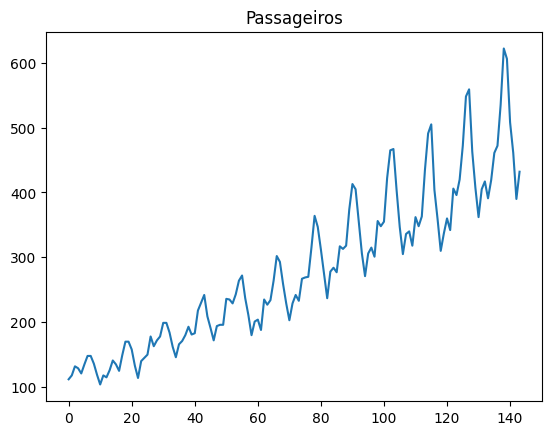

In [5]:
plt.plot(data_frame, label="dados")
plt.title("Passageiros")
plt.show()

In [6]:
stl = STL(data_frame, period=12)
result = stl.fit()

In [7]:
result.resid

array([  0.38869165,  -2.50648448,  -0.93443536,   2.14385312,
         1.95605119,   1.21876536,  -0.801732  ,   0.80579748,
        -1.9027946 ,   1.34035613,   1.64875164,  -1.83069181,
        -4.50293532,  -1.0653512 ,  -3.05624043,  -1.90081565,
        -7.76913529,  -1.31298748,   2.38892405,   0.4817769 ,
         2.38698361,  -2.88037435,  -5.81069388,  -0.20768399,
         2.3838169 ,   0.80920907,   6.41871576,  -0.98464687,
         9.20746751,  -4.66825061,  -2.50145174,  -5.8930718 ,
        -0.16008274,  -0.26006862,   3.2520468 ,   2.09624509,
         3.27698426,   8.71168774,  -5.99509873,  -9.4598575 ,
        -8.93171191,   5.01143759,  -3.70992273,   2.929404  ,
        -4.03868941,   0.07553719,   2.30693764,   1.65977202,
        -1.13773029,   1.01444214,   8.23247376,  14.53110887,
         7.80599534,  -2.83088818,  -6.24565419,   2.06311381,
         1.10346216,   2.71991918,  -0.75104046,  -2.53694466,
        -3.91658906, -12.0814284 ,  -2.01074838,  -5.79

In [8]:
anomalies = np.where(np.abs(result.resid) > 2.5 * np.std(result.resid))[0]

In [9]:
anomalies

array([ 51, 111, 122], dtype=int64)

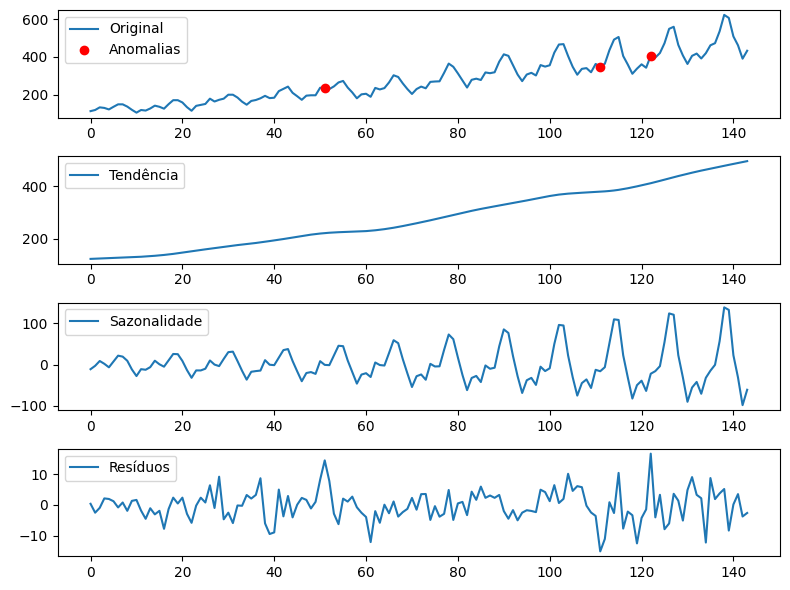

In [10]:
plt.figure(figsize=(8,6))

plt.subplot(411)
plt.plot(data_frame, label='Original')
plt.plot(anomalies, data_frame[anomalies], 'ro', markersize=6, label="Anomalias")
plt.legend(loc='best')

plt.subplot(412)
plt.plot(result.trend, label='Tendência')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(result.seasonal, label='Sazonalidade')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(result.resid, label="Resíduos")
plt.legend(loc='best')

plt.tight_layout()
plt.show()